Epoch 1/20


c:\Users\Devyansh\Desktop\Core Subjects\SDL\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2223 - val_loss: 0.0949
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0757 - val_loss: 0.0489
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - val_loss: 0.0102
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 5.0800e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0793e-04 - val_loss: 2.1848e-05
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6815e-05 - val_loss: 5.2471e-06
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4074e-06 - val_loss: 3.2233e-06
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2817e-06 - val_loss: 2.3788e-06
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0619e-06 - val_loss: 1.6817e-06
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6021e-06 - val_loss: 1.1446e-06
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━

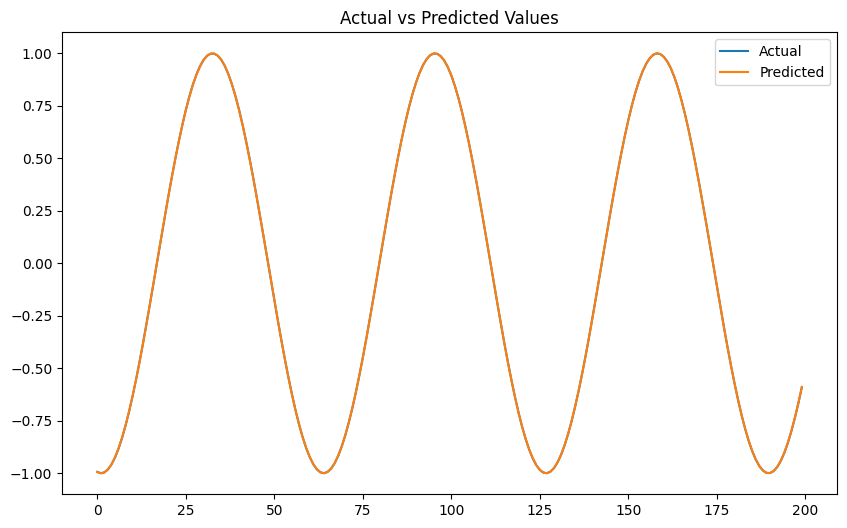

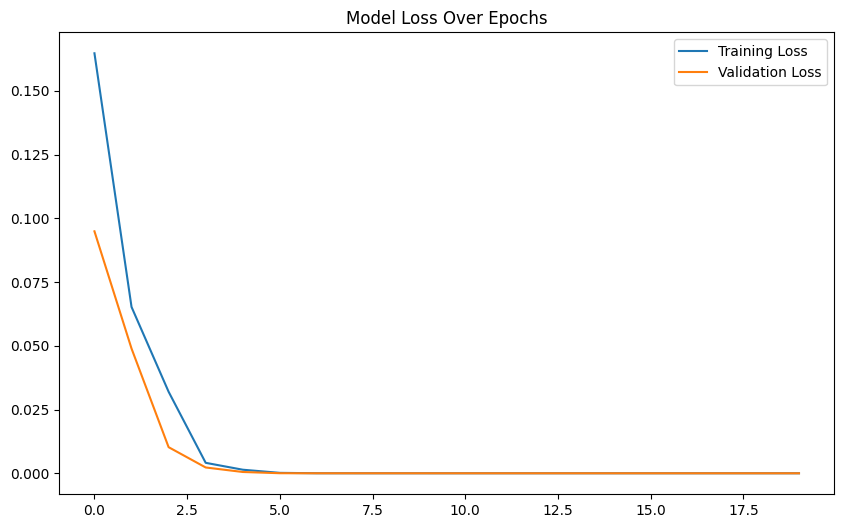

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Step 1: Generate a synthetic time-series dataset (sine wave)
def generate_sine_wave(sequence_length, num_samples):
    X, y = [], []
    for i in range(num_samples):
        x = np.sin(np.linspace(0, 2 * np.pi, sequence_length) + (i / 10.0))
        X.append(x[:-1])
        y.append(x[-1])
    return np.array(X), np.array(y)

# Generate data
sequence_length = 50  # Length of each sequence
num_samples = 1000    # Total number of samples
X, y = generate_sine_wave(sequence_length, num_samples)

# Step 2: Preprocess data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)  # Scale data to [0, 1]
y = scaler.fit_transform(y.reshape(-1, 1))

# Reshape X for LSTM input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 3: Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(sequence_length - 1, 1)),
    Dense(1)  # Output layer
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse:.4f}")

# Step 5: Visualize results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss Over Epochs")
plt.show()
